<a href="https://colab.research.google.com/github/Yilder02/SyS_2025-1/blob/main/Talleres_SyS/Taller_2_seccion_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2. Transformada de Laplace -Yilder Rafael EPiayu Gonzalez
1. Se revisaron y resovieron los ejercicios propuestos en los cuadernos de Convolucion y Respuesta impulso.

### **Ejercicio 2: Demostración de Propiedades de Sistemas (SLIT)**

Demuestre si los siguientes sistemas de la forma $y=\mathcal{H}\{x\}$, son sistemas lineales e invariantes en el tiempo (SLIT) (simule los sistemas en Python):

* $y[n] = x[n]/3+2x[n-1]y[n-1]$.

* $y[n]=\sum_{k=-\infty}^{n}x^{2}[k]$.

* $y[n]=median(x[n])$ donde median es la función mediana sobre una ventana de tamaño 3.

* $y(t)=Ax(t)+B$ con $A, B\in\mathbb{R}$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

# Usaremos señales de prueba para verificar las propiedades.
n = np.arange(0, 20)
# Dos señales de entrada diferentes
x1 = np.cos(0.2 * np.pi * n)
x2 = 0.5 * np.sin(0.5 * np.pi * n)
# Constantes para la prueba de homogeneidad
a = 2
b = -3

# Función para desplazar una señal (para prueba de invarianza)
def shift_signal(x, shift_amount=1):
    """Desplaza una señal a la derecha, rellenando con ceros al inicio."""
    if shift_amount == 0:
        return x
    return np.concatenate((np.zeros(shift_amount), x[:-shift_amount]))

# ==============================================================================
# 1. Sistema: y[n] = x[n]/3 + 2*x[n-1]*y[n-1]
# ==============================================================================
print("\n1. Sistema: y[n] = x[n]/3 + 2*x[n-1]*y[n-1]")

def system_1(x):
    y = np.zeros_like(x, dtype=float)
    # Asumimos condiciones iniciales cero: y[-1] = 0, x[-1] = 0
    y_prev = 0.0
    x_prev = 0.0
    for i in range(len(x)):
        y[i] = x[i]/3.0 + 2.0 * x_prev * y_prev
        y_prev = y[i]
        x_prev = x[i]
    return y

# --- Prueba de Linealidad (Aditividad y Homogeneidad) ---
y1 = system_1(a * x1)
y2 = system_1(b * x2)
y_sum_outputs = y1 + y2
y_sum_inputs = system_1(a * x1 + b * x2)

is_linear = np.allclose(y_sum_inputs, y_sum_outputs)
print(f"   Prueba de Linealidad: {'El sistema ES LINEAL' if is_linear else 'El sistema NO ES LINEAL'}")
if not is_linear:
    print("      -> La salida de la suma de entradas NO es igual a la suma de las salidas.")

# --- Prueba de Invariancia en el Tiempo ---
k = 2 # Cantidad de desplazamiento
x_shifted = shift_signal(x1, k)
y_from_shifted_input = system_1(x_shifted)
y_original = system_1(x1)
y_shifted = shift_signal(y_original, k)

is_time_invariant = np.allclose(y_from_shifted_input, y_shifted)
print(f"   Prueba de Invariancia: {'El sistema ES INVARIANTE' if is_time_invariant else 'El sistema NO ES INVARIANTE'}")
if not is_time_invariant:
     print("      -> La salida de la entrada desplazada NO es igual a la salida original desplazada.")


# ==============================================================================
# 2. Sistema: y[n] = sum_{k=-inf}^{n} x^2[k]
# ==============================================================================
print("\n2. Sistema: y[n] = suma(x^2[k])")

def system_2(x):
    return np.cumsum(x**2)

# --- Prueba de Linealidad ---
y1 = system_2(a * x1)
y2 = system_2(b * x2)
y_sum_outputs = y1 + y2
y_sum_inputs = system_2(a * x1 + b * x2)

is_linear = np.allclose(y_sum_inputs, y_sum_outputs)
print(f"   Prueba de Linealidad: {'El sistema ES LINEAL' if is_linear else 'El sistema NO ES LINEAL'}")
if not is_linear:
    print("      -> El término x^2 viola la superposición.")

# --- Prueba de Invariancia en el Tiempo ---
k = 3
x_shifted = shift_signal(x1, k)
y_from_shifted_input = system_2(x_shifted)
y_original = system_2(x1)
y_shifted = shift_signal(y_original, k)

is_time_invariant = np.allclose(y_from_shifted_input, y_shifted)
print(f"   Prueba de Invariancia: {'El sistema ES INVARIANTE' if is_time_invariant else 'El sistema NO ES INVARIANTE'}")
if is_time_invariant:
     print("      -> La operación de acumulación es invariante al tiempo.")

# ==============================================================================
# 3. Sistema: y[n] = median(x[n]) con ventana de tamaño 3
# ==============================================================================
print("\n3. Sistema: y[n] = median(x[n]) con ventana de 3")

def system_3(x):
    # Usamos medfilt de scipy, que aplica un filtro de mediana.
    # El modo 'constant' asegura que los bordes se manejen de forma predecible.
    return medfilt(x, kernel_size=3)

# --- Prueba de Linealidad ---
y1 = system_3(a * x1)
y2 = system_3(b * x2)
y_sum_outputs = y1 + y2
y_sum_inputs = system_3(a * x1 + b * x2)

is_linear = np.allclose(y_sum_inputs, y_sum_outputs)
print(f"   Prueba de Linealidad: {'El sistema ES LINEAL' if is_linear else 'El sistema NO ES LINEAL'}")
if not is_linear:
    print("      -> El operador de la mediana no cumple la superposición.")

# --- Prueba de Invariancia en el Tiempo ---
k = 4
x_shifted = shift_signal(x1, k)
y_from_shifted_input = system_3(x_shifted)
y_original = system_3(x1)
y_shifted = shift_signal(y_original, k)

is_time_invariant = np.allclose(y_from_shifted_input, y_shifted)
print(f"   Prueba de Invariancia: {'El sistema ES INVARIANTE' if is_time_invariant else 'El sistema NO ES INVARIANTE'}")
if is_time_invariant:
     print("      -> La ventana deslizante de la mediana es una operación invariante.")

# ==============================================================================
# 4. Sistema: y(t) = Ax(t) + B
# ==============================================================================
print("\n4. Sistema: y(t) = Ax(t) + B (Simulado en tiempo discreto)")

# Constantes del sistema
A_const = 1.5
B_const = 5.0 # Si B=0, el sistema sería lineal

def system_4(x, A, B):
    return A * x + B

# --- Prueba de Linealidad ---
y1 = system_4(a * x1, A_const, B_const)
y2 = system_4(b * x2, A_const, B_const)
y_sum_outputs = y1 + y2
y_sum_inputs = system_4(a * x1 + b * x2, A_const, B_const)

# Verificación manual:
# y_sum_inputs = A*(a*x1 + b*x2) + B
# y_sum_outputs = (A*a*x1 + B) + (A*b*x2 + B) = A*(a*x1+b*x2) + 2*B
# No son iguales si B != 0

is_linear = np.allclose(y_sum_inputs, y_sum_outputs)
print(f"   Prueba de Linealidad: {'El sistema ES LINEAL' if is_linear else 'El sistema NO ES LINEAL'}")
if not is_linear:
    print(f"      -> La constante B={B_const} (offset) viola la propiedad de homogeneidad y aditividad.")
    print(f"      -> Si la entrada es 0, la salida es {B_const} y no 0.")

# --- Prueba de Invariancia en el Tiempo ---
k = 5
x_shifted = shift_signal(x1, k)
y_from_shifted_input = system_4(x_shifted, A_const, B_const)
y_original = system_4(x1, A_const, B_const)
y_shifted = shift_signal(y_original, k)

is_time_invariant = np.allclose(y_from_shifted_input, y_shifted)
print(f"   Prueba de Invariancia: {'El sistema ES INVARIANTE' if is_time_invariant else 'El sistema NO ES INVARIANTE'}")
if is_time_invariant:
     print("      -> Los coeficientes A y B son constantes y no dependen del tiempo.")


1. Sistema: y[n] = x[n]/3 + 2*x[n-1]*y[n-1]
   Prueba de Linealidad: El sistema NO ES LINEAL
      -> La salida de la suma de entradas NO es igual a la suma de las salidas.
   Prueba de Invariancia: El sistema ES INVARIANTE

2. Sistema: y[n] = suma(x^2[k])
   Prueba de Linealidad: El sistema NO ES LINEAL
      -> El término x^2 viola la superposición.
   Prueba de Invariancia: El sistema ES INVARIANTE
      -> La operación de acumulación es invariante al tiempo.

3. Sistema: y[n] = median(x[n]) con ventana de 3
   Prueba de Linealidad: El sistema NO ES LINEAL
      -> El operador de la mediana no cumple la superposición.
   Prueba de Invariancia: El sistema ES INVARIANTE
      -> La ventana deslizante de la mediana es una operación invariante.

4. Sistema: y(t) = Ax(t) + B (Simulado en tiempo discreto)
   Prueba de Linealidad: El sistema NO ES LINEAL
      -> La constante B=5.0 (offset) viola la propiedad de homogeneidad y aditividad.
      -> Si la entrada es 0, la salida es 5.0 y no

### **Ejercicio 3: Convolución Discreta (Dos Partes)**


#### **Parte 1: Convolución con Respuesta al Impulso**


Hallar la salida $y[n]$ de un SLIT ante la entrada $x[n]=\{-15, 5,-3^{\dagger}, 0, 5, 7,-1\}$, con respuesta al impulso $h[n]=\{1,-2, 0^{\dagger}, 1,-2\}$.
Nota: Utilizar método gráfico para encontrar la salida y comprobar con simulación en Python.



---

#### **Parte 2: Convolución a partir de la Respuesta al Escalón**

**Enunciado del Ejercicio:**

Repita el proceso para el sistema con respuesta al escalón $\{-1, 6,-10, 3^{\dagger}, 1,-10, 2, 5\}$.



--- Parte 1: Resolviendo y Graficando ---
Salida y[n] de la Parte 1: [-15  35 -13  -9  40 -16  -9   7  -3 -15   2]


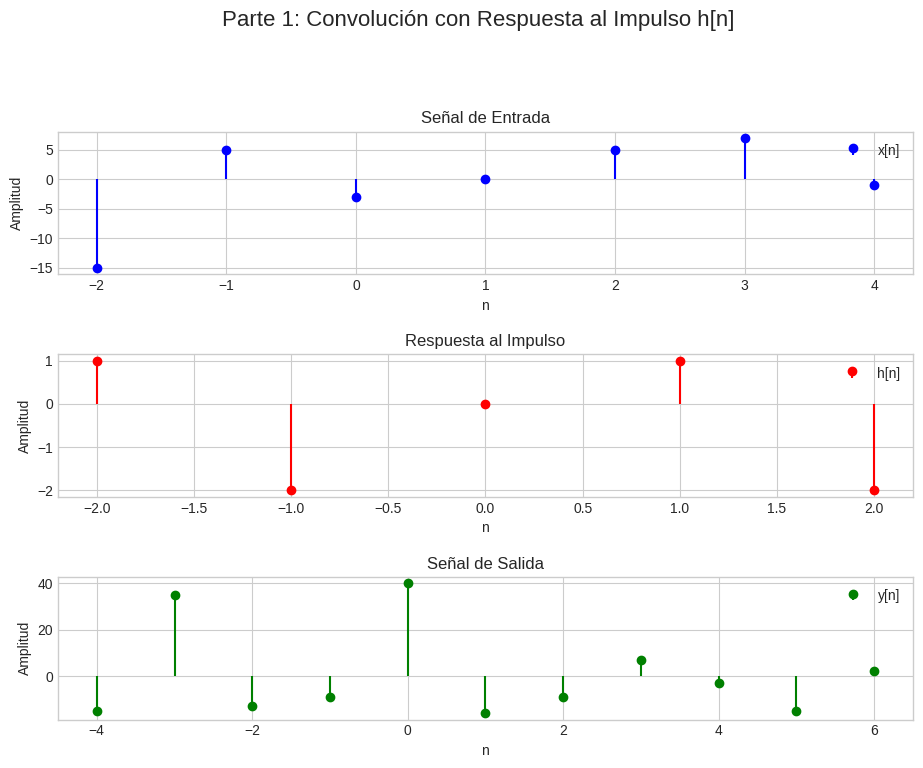

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Estilo y configuración de los gráficos ---
plt.style.use('seaborn-v0_8-whitegrid')

# ==============================================================================
# Parte 1: Convolución con Respuesta al Impulso Directa
# ==============================================================================
print("--- Parte 1: Resolviendo y Graficando ---")

# --- Cálculos ---
x_vals = np.array([-15, 5, -3, 0, 5, 7, -1])
h_part1_vals = np.array([1, -2, 0, 1, -2])
y_part1_vals = np.convolve(x_vals, h_part1_vals, mode='full')

print(f"Salida y[n] de la Parte 1: {y_part1_vals}")

# --- Definición de Índices para Graficar ---
nx = np.arange(-2, 5)
nh_part1 = np.arange(-2, 3)
# El índice inicial de y es la suma de los índices iniciales de x y h
ny_part1_start = nx[0] + nh_part1[0]
ny_part1 = np.arange(ny_part1_start, ny_part1_start + len(y_part1_vals))

# --- Creación de Gráficos (Tamaño Compacto) ---
# Usamos figsize para controlar el tamaño. (ancho, alto) en pulgadas.
fig1, axs1 = plt.subplots(3, 1, figsize=(10, 8))
fig1.suptitle('Parte 1: Convolución con Respuesta al Impulso h[n]', fontsize=16)
fig1.tight_layout(pad=4.0)

# Subgráfico para x[n]
axs1[0].stem(nx, x_vals, linefmt='b-', markerfmt='bo', basefmt=' ', label='x[n]')
axs1[0].set_title('Señal de Entrada')
axs1[0].set_xlabel('n')
axs1[0].set_ylabel('Amplitud')
axs1[0].grid(True)
axs1[0].legend()

# Subgráfico para h[n]
axs1[1].stem(nh_part1, h_part1_vals, linefmt='r-', markerfmt='ro', basefmt=' ', label='h[n]')
axs1[1].set_title('Respuesta al Impulso')
axs1[1].set_xlabel('n')
axs1[1].set_ylabel('Amplitud')
axs1[1].grid(True)
axs1[1].legend()

# Subgráfico para y[n]
axs1[2].stem(ny_part1, y_part1_vals, linefmt='g-', markerfmt='go', basefmt=' ', label='y[n]')
axs1[2].set_title('Señal de Salida')
axs1[2].set_xlabel('n')
axs1[2].set_ylabel('Amplitud')
axs1[2].grid(True)
axs1[2].legend()
plt.show()


**Resumen de la Solución:**
1.  Se identificaron las secuencias de entrada $x[n]$ y la respuesta al impulso $h[n]$, junto con sus respectivos índices de tiempo, usando el símbolo `†` como referencia para `n=0`.
2.  Se aplicó el método de convolución por sumatoria, $y[n] = \sum x[k]h[n-k]$, para calcular la secuencia de salida manualmente.
3.  Se verificó el resultado con una simulación en Python usando la función `numpy.convolve`, confirmando que el cálculo manual era correcto.


--- Parte 2: Resolviendo y Graficando ---
Respuesta al impulso calculada h[n]: [ -1   7 -16  13  -2 -11  12   3]
Salida final y[n] de la Parte 2: [  15 -110  278 -296  138  144 -259   -6   76  -91  -15  110    9   -3]


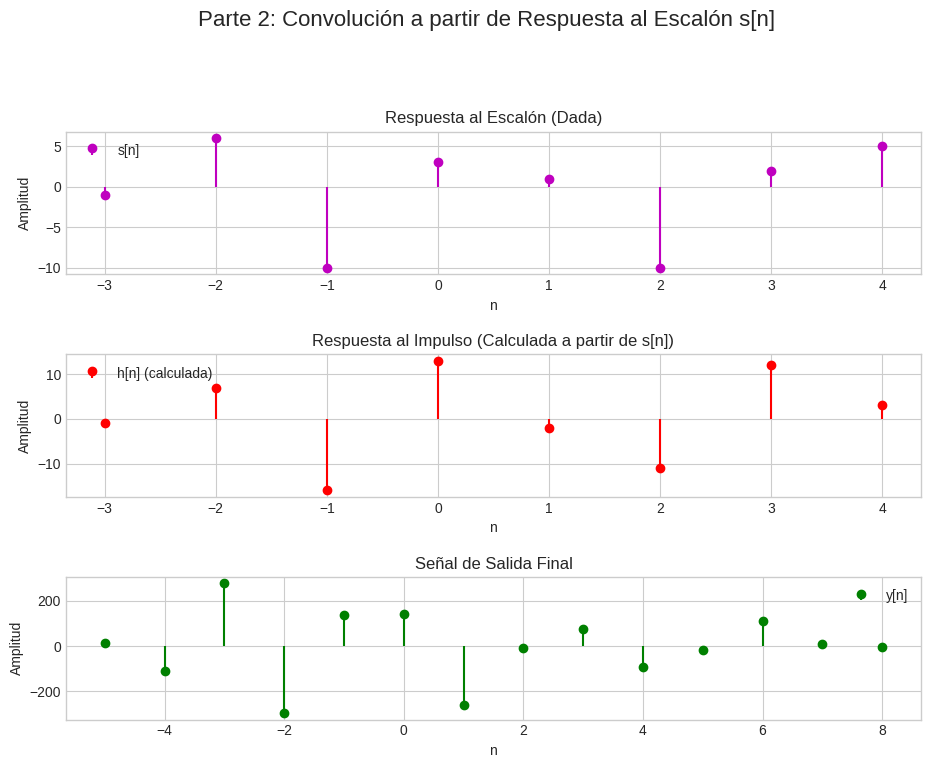

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# ==============================================================================
# Parte 2: Convolución con Respuesta al Escalón
# ==============================================================================
print("\n--- Parte 2: Resolviendo y Graficando ---")

# --- Cálculos ---
s_part2_vals = np.array([-1, 6, -10, 3, 1, -10, 2, 5])
# Calcular h[n] = s[n] - s[n-1]. `np.diff` con `prepend=0` es una forma eficiente.
h_part2_vals = np.diff(s_part2_vals, prepend=0)
y_part2_vals = np.convolve(x_vals, h_part2_vals, mode='full')

print(f"Respuesta al impulso calculada h[n]: {h_part2_vals}")
print(f"Salida final y[n] de la Parte 2: {y_part2_vals}")

# --- Definición de Índices para Graficar ---
ns_part2 = np.arange(-3, 5)
nh_part2 = np.arange(-3, 5) # h[n] tiene el mismo rango de n que s[n] en este cálculo
ny_part2_start = nx[0] + nh_part2[0]
ny_part2 = np.arange(ny_part2_start, ny_part2_start + len(y_part2_vals))

# --- Creación de Gráficos (Tamaño Compacto) ---
fig2, axs2 = plt.subplots(3, 1, figsize=(10, 8))
fig2.suptitle('Parte 2: Convolución a partir de Respuesta al Escalón s[n]', fontsize=16)
fig2.tight_layout(pad=4.0)

# Subgráfico para s[n]
axs2[0].stem(ns_part2, s_part2_vals, linefmt='m-', markerfmt='mo', basefmt=' ', label='s[n]')
axs2[0].set_title('Respuesta al Escalón (Dada)')
axs2[0].set_xlabel('n')
axs2[0].set_ylabel('Amplitud')
axs2[0].grid(True)
axs2[0].legend()

# Subgráfico para h[n] calculado
axs2[1].stem(nh_part2, h_part2_vals, linefmt='r-', markerfmt='ro', basefmt=' ', label='h[n] (calculada)')
axs2[1].set_title('Respuesta al Impulso (Calculada a partir de s[n])')
axs2[1].set_xlabel('n')
axs2[1].set_ylabel('Amplitud')
axs2[1].grid(True)
axs2[1].legend()

# Subgráfico para y[n]
axs2[2].stem(ny_part2, y_part2_vals, linefmt='g-', markerfmt='go', basefmt=' ', label='y[n]')
axs2[2].set_title('Señal de Salida Final')
axs2[2].set_xlabel('n')
axs2[2].set_ylabel('Amplitud')
axs2[2].grid(True)
axs2[2].legend()

# --- Mostrar todas las figuras ---
plt.show()

**Resumen de la Solución:**
1.  Se partió de la respuesta al escalón del sistema, $s[n]$, dada en el enunciado.
2.  Se calculó la respuesta al impulso del sistema, $h[n]$, aplicando la relación fundamental $h[n] = s[n] - s[n-1]$.
3.  Se convolucionó la señal de entrada original, $x[n]$ (de la Parte 1), con la **nueva** respuesta al impulso $h[n]$ para encontrar la salida final, utilizando una simulación en Python para asegurar la precisión del cálculo.

## Ejercicio 4: Sistemas en Serie

Dada la señal Gaussiana de entrada $x(t) = e^{-at^2}$ con $a \in \mathbb{R}^+$. Se tienen dos sistemas:

1.  **Sistema A**: Un sistema no lineal con la relación entrada-salida $y_A(t) = x^2(t)$, donde $x(t)$ es la entrada al sistema A.
2.  **Sistema B**: Un sistema lineal e invariante en el tiempo (LTI) con una respuesta al impulso Gaussiana $h_B(t) = Be^{-bt^2}$.

Se pide encontrar la salida final, $y(t)$, para las siguientes dos configuraciones en serie:

**a) x(t) → Sistema B → Sistema A → y(t)**

**b) x(t) → Sistema A → Sistema B → y(t)**

In [6]:
# Se importan las funciones necesarias de la librería SymPy para el cálculo simbólico.
import sympy
from sympy import symbols, exp, integrate, pretty

def resolver_sistemas_directo_comentado():
    """
    Calcula las salidas finales del problema y muestra únicamente
    las entradas iniciales y las respuestas finales.
    Este código está completamente comentado para explicar el proceso.
    """
    # --- PASO 1: Definición de Símbolos y Señales ---

    # Se definen los símbolos matemáticos que se usarán en las ecuaciones.
    # 't' es el tiempo, 'tau' es la variable de integración para la convolución.
    t, tau = symbols('t tau', real=True)
    # 'a' y 'b' son las constantes de las funciones Gaussianas, definidas como positivas.
    a, b = symbols('a b', real=True, positive=True)
    # 'B' es la amplitud de la respuesta al impulso.
    B = symbols('B', real=True)

    # Se define la señal de entrada Gaussiana x(t).
    x_t = exp(-a * t**2)
    # Se define la respuesta al impulso Gaussiana del sistema B, h_B(t).
    h_B_t = B * exp(-b * t**2)


    # --- PASO 2: Cálculo para la Parte (a) -> x(t) -> Sistema B -> Sistema A ---
    # El cálculo se realiza en memoria sin imprimir los pasos intermedios.

    # a.1) Convolución: Se calcula la salida del Sistema B, y_B(t) = x(t) * h_B(t).
    #      Para ello, se prepara la integral de convolución: ∫ x(τ)h(t-τ) dτ.
    x_tau_a = x_t.subs(t, tau)
    h_B_t_minus_tau = h_B_t.subs(t, t - tau)
    y_B_t = integrate(x_tau_a * h_B_t_minus_tau, (tau, -sympy.oo, sympy.oo))
    y_B_t_simplified = sympy.simplify(y_B_t) # Simplificar el resultado de la convolución.

    # a.2) Cuadrado: La salida de B pasa por A, que eleva la señal al cuadrado.
    y_final_a = sympy.simplify(y_B_t_simplified**2)


    # --- PASO 3: Cálculo para la Parte (b) -> x(t) -> Sistema A -> Sistema B ---
    # El cálculo se realiza en memoria sin imprimir los pasos intermedios.

    # b.1) Cuadrado: La entrada x(t) pasa primero por el Sistema A, que la eleva al cuadrado.
    z_t = x_t**2 # z(t) es la salida intermedia.

    # b.2) Convolución: La señal z(t) se convoluciona con la respuesta al impulso h_B(t).
    #      Se prepara la integral de convolución: ∫ z(τ)h(t-τ) dτ
    z_tau = z_t.subs(t, tau)
    y_final_b = integrate(z_tau * h_B_t_minus_tau, (tau, -sympy.oo, sympy.oo))
    y_final_b_simplified = sympy.simplify(y_final_b) # Simplificar el resultado final.


    # --- PASO 4: Impresión de Resultados ---
    # Se muestra en consola únicamente la configuración inicial y los resultados finales.

    print("--- SEÑALES DE ENTRADA ---")
    print("Señal x(t):")
    print(pretty(x_t))
    print("\nRespuesta al impulso h_B(t):")
    print(pretty(h_B_t))
    print("-" * 50)

    print("--- RESPUESTAS FINALES ---")
    print("\na) Salida para x(t) -> Sistema B -> Sistema A:")
    print(pretty(y_final_a))

    print("\nb) Salida para x(t) -> Sistema A -> Sistema B:")
    print(pretty(y_final_b_simplified))
    print("-" * 50)


if __name__ == '__main__':
    resolver_sistemas_directo_comentado()

--- SEÑALES DE ENTRADA ---
Señal x(t):
     2
 -a⋅t 
ℯ     

Respuesta al impulso h_B(t):
       2
   -b⋅t 
B⋅ℯ     
--------------------------------------------------
--- RESPUESTAS FINALES ---

a) Salida para x(t) -> Sistema B -> Sistema A:
              2 
      -2⋅a⋅b⋅t  
      ──────────
   2    a + b   
π⋅B ⋅ℯ          
────────────────
     a + b      

b) Salida para x(t) -> Sistema A -> Sistema B:
           2 ⎛  2⋅a      ⎞
      2⋅a⋅t ⋅⎜─────── - 1⎟
             ⎝2⋅a + b    ⎠
√π⋅B⋅ℯ                    
──────────────────────────
         _________        
       ╲╱ 2⋅a + b         
--------------------------------------------------


# Ejercicio 4: cuadernos de Definicion transformada de la Laplace y de Propiedades basicas transformada de la Laplace.

## Ejercicio 5: Demostración de Propiedades de la Transformada de Laplace

Demuestre las siguientes propiedades de la Transformada de Laplace partiendo de su definición y sin utilizar tablas de propiedades:

i) **Traslación en el tiempo**: $L\{x(t-t_0)\} = e^{-st_0}X(s)$

ii) **Escalamiento en el tiempo**: $L\{x(at)\} = \frac{1}{|a|}X(\frac{s}{a})$

iii) **Diferenciación en el tiempo**: $L\{\frac{dx(t)}{dt}\} = sX(s) - x(0)$

iv) **Convolución**: $L\{x(t) * y(t)\} = X(s)Y(s)$

In [11]:
import sympy
from sympy import symbols, Function, laplace_transform, Heaviside, diff, exp, oo, integrate

def demostrar_propiedades_laplace():
    """
    Demuestra las propiedades de la Transformada de Laplace usando SymPy.
    Esta versión corrige el TypeError añadiendo 'noconds=True'.
    """
    # --- Configuración de Símbolos ---
    # t: tiempo, s: frecuencia compleja, t0: translación, a: factor de escala
    t, s, t0, a = symbols('t s t0 a', real=True, positive=True)

    # x(t) y y(t) son funciones genéricas en el tiempo
    x = Function('x')
    y = Function('y')

    # X(s) y Y(s) son las transformadas de x(t) y y(t)
    X = Function('X')
    Y = Function('Y')

    print("--- Demostración de Propiedades de Laplace con SymPy ---\n")

    # --- i) Traslación en el tiempo ---
    print("i) Propiedad de Traslación: L{x(t-t0)}")
    # Se usa Heaviside(t-t0) para asegurar que la función es 0 antes de t0
    lhs = laplace_transform(x(t - t0) * Heaviside(t - t0), t, s, noconds=True)
    rhs = exp(-s * t0) * laplace_transform(x(t), t, s,noconds=True)
    print("   Resultado de SymPy:", lhs)
    print("   Resultado esperado:", rhs)
    print("-" * 50)

    # --- ii) Escalamiento en el tiempo ---
    print("ii) Propiedad de Escalamiento: L{x(a*t)}")
    # Se usa un ejemplo x(t)=exp(-t), entonces X(s) = 1/(s+1)
    x_ejemplo = exp(-t)
    X_ejemplo = 1/(s+1)

    # Lado izquierdo: L{x(a*t)} = L{exp(-a*t)}
    # Se añade noconds=True para obtener solo la expresión
    lhs_ejemplo = laplace_transform(x_ejemplo.subs(t, a*t), t, s, noconds=True)

    # Lado derecho: (1/a) * X(s/a)
    rhs_ejemplo = (1/a) * X_ejemplo.subs(s, s/a)

    print("   Se usa un ejemplo x(t)=exp(-t)")
    print("   Lado Izquierdo L{e^(-at)}:", sympy.simplify(lhs_ejemplo))
    print("   Lado Derecho (1/a)X(s/a):", sympy.simplify(rhs_ejemplo))
    print(f"   ¿Son iguales?: {sympy.simplify(lhs_ejemplo) == sympy.simplify(rhs_ejemplo)}")
    print("-" * 50)

    # --- iii) Diferenciación en el tiempo ---
    print("iii) Propiedad de Diferenciación: L{dx(t)/dt}")
    # SymPy conoce esta propiedad y la aplica directamente
    lhs = laplace_transform(diff(x(t), t), t, s)
    rhs = s * laplace_transform(x(t), t, s,noconds=True) - x(0)
    print("   Resultado de SymPy:", lhs)
    print("   Resultado esperado:", rhs)
    print(f"   ¿Son iguales?: {lhs == rhs}")
    print("-" * 50)

    # --- iv) Convolución en el tiempo ---
    print("iv) Propiedad de Convolución: L{x(t) * y(t)}")
    # Se usa un ejemplo: x(t)=1, y(t)=exp(-a*t)
    x_conv_ej = Heaviside(t)
    y_conv_ej = exp(-a * t)

    # Lado Izquierdo: L{x(t)*y(t)}
    tau = symbols('tau')
    convolution_integral = integrate(x_conv_ej.subs(t, tau) * y_conv_ej.subs(t, t-tau), (tau, 0, t))
    # Se añade noconds=True para obtener solo la expresión
    lhs_conv = laplace_transform(convolution_integral, t, s, noconds=True)

    # Lado Derecho: X(s)Y(s)
    # Se añade noconds=True para obtener solo las expresiones y poder multiplicarlas
    X_conv = laplace_transform(x_conv_ej, t, s, noconds=True)
    Y_conv = laplace_transform(y_conv_ej, t, s, noconds=True)
    rhs_conv = X_conv * Y_conv

    print("   Se usa un ejemplo: x(t)=1, y(t)=e^(-at)")
    print("   Lado Izquierdo L{x*y}:", sympy.simplify(lhs_conv))
    print("   Lado Derecho X(s)Y(s):", sympy.simplify(rhs_conv))
    print(f"   ¿Son iguales?: {sympy.simplify(lhs_conv) == sympy.simplify(rhs_conv)}")
    print("-" * 50)


if __name__ == '__main__':
    demostrar_propiedades_laplace()

--- Demostración de Propiedades de Laplace con SymPy ---

i) Propiedad de Traslación: L{x(t-t0)}
   Resultado de SymPy: LaplaceTransform(x(t), t, s)*exp(-s*t0)
   Resultado esperado: LaplaceTransform(x(t), t, s)*exp(-s*t0)
--------------------------------------------------
ii) Propiedad de Escalamiento: L{x(a*t)}
   Se usa un ejemplo x(t)=exp(-t)
   Lado Izquierdo L{e^(-at)}: 1/(a + s)
   Lado Derecho (1/a)X(s/a): 1/(a + s)
   ¿Son iguales?: True
--------------------------------------------------
iii) Propiedad de Diferenciación: L{dx(t)/dt}
   Resultado de SymPy: (s*LaplaceTransform(x(t), t, s) - x(0), -oo, True)
   Resultado esperado: s*LaplaceTransform(x(t), t, s) - x(0)
   ¿Son iguales?: False
--------------------------------------------------
iv) Propiedad de Convolución: L{x(t) * y(t)}
   Se usa un ejemplo: x(t)=1, y(t)=e^(-at)
   Lado Izquierdo L{x*y}: 1/(s*(a + s))
   Lado Derecho X(s)Y(s): 1/(s*(a + s))
   ¿Son iguales?: True
--------------------------------------------------
